In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Load Dataset
df = pd.read_csv('online_course_completion.csv')
df.head()


,age,continent,country,education_level,hours_per_week,num_logins_last_month,videos_watched_pct,assignments_submitted,discussion_posts,is_working_professional,preferred_device,completed_course,height_cm,weight_kg,num_siblings,has_pet,favorite_color,birth_month
0,56,Asia,Japan,Bachelors,9.116071,23,0.507679,7,1,1,mobile,0,175.0,54.1,2,0,red,May
1,46,Africa,Kenya,No Formal Education,0.454712,19,0.631424,1,1,1,desktop,0,168.6,57.7,3,0,black,Sep
2,32,South America,Brazil,Bachelors,4.946724,22,0.424817,2,2,0,console,0,176.5,80.2,2,1,green,Jul
3,25,Africa,Nigeria,Bachelors,5.053960,24,0.318874,3,0,1,console,0,185.2,76.3,1,0,purple,Jun
4,38,Asia,India,Bachelors,9.870424,28,1.000000,6,0,0,mobile,1,167.7,76.3,2,0,orange,Nov


In [3]:
#Explore the Data
df.info()
df.describe()
df.isnull().sum()
df['completed_course'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   age                      500000 non-null  int64  
 1   continent                500000 non-null  object 
 2   country                  500000 non-null  object 
 3   education_level          475000 non-null  object 
 4   hours_per_week           500000 non-null  float64
 5   num_logins_last_month    500000 non-null  int64  
 6   videos_watched_pct       475000 non-null  float64
 7   assignments_submitted    500000 non-null  int64  
 8   discussion_posts         500000 non-null  int64  
 9   is_working_professional  500000 non-null  int64  
 10  preferred_device         475000 non-null  object 
 11  completed_course         500000 non-null  int64  
 12  height_cm                500000 non-null  float64
 13  weight_kg                500000 non-null  float64
 14  num_

0    375089
1    124911
Name: completed_course, dtype: int64

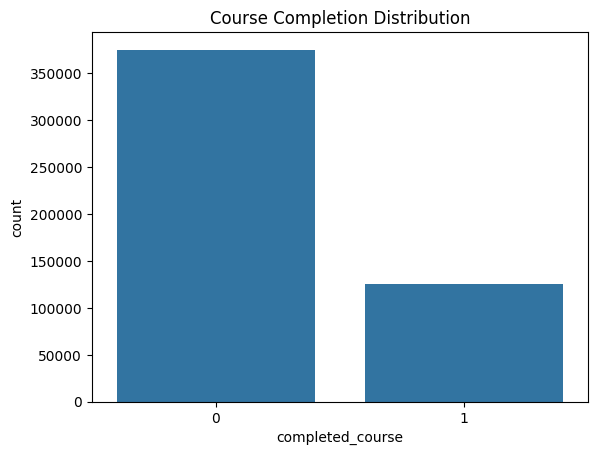

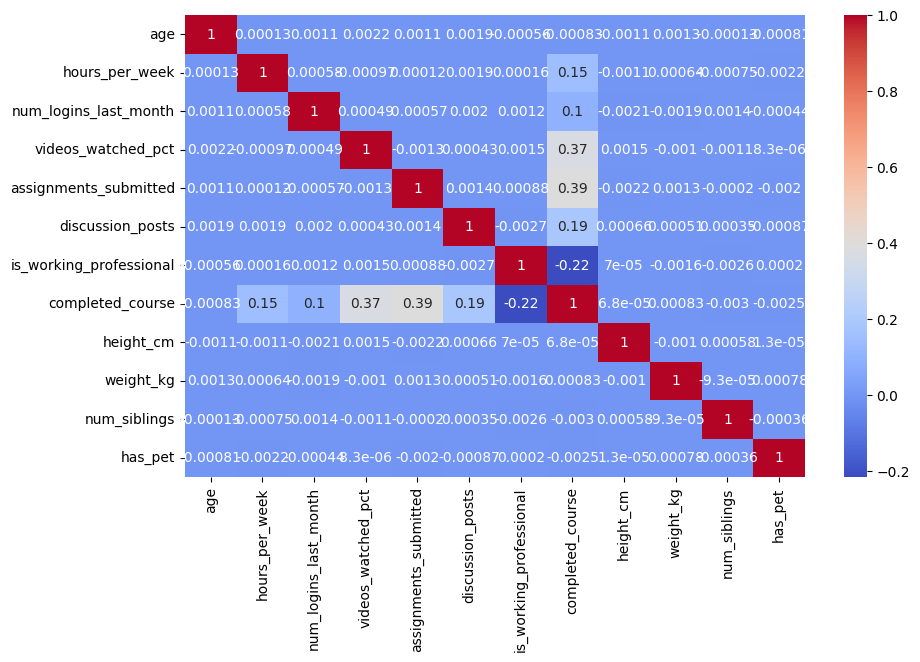

In [4]:
#Visualize the Data
sns.countplot(x='completed_course', data=df)
plt.title('Course Completion Distribution')
plt.show()
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()


In [5]:
#Preprocess the Data
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    if col != 'completed_course':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
if df['completed_course'].dtype == 'object':
    df['completed_course'] = df['completed_course'].map({'yes':1, 'no':0})  # adjust based on values


In [6]:
#Split the Data
X = df.drop('completed_course', axis=1)
y = df['completed_course']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
#Future Engineering 
if 'total_time_spent' in df.columns and 'num_sessions' in df.columns:
    df['avg_time_per_session'] = df['total_time_spent'] / (df['num_sessions'] + 1e-5)

if {'assignments_completed', 'assignments_given'}.issubset(df.columns):
    df['assignment_completion_rate'] = df['assignments_completed'] / (df['assignments_given'] + 1e-5)
    
for col in ['time_on_videos', 'total_time_spent']:
    if col in df.columns:
        df[col] = np.log1p(df[col])


In [9]:
#Train the Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [10]:
#Evaluate the Model
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.96424
Confusion Matrix:
 [[74923    92]
 [ 3484 21501]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     75015
           1       1.00      0.86      0.92     24985

    accuracy                           0.96    100000
   macro avg       0.98      0.93      0.95    100000
weighted avg       0.97      0.96      0.96    100000

